In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
data=pd.read_csv("C:/Users/Ricky/Desktop/MASTERS/DATA SCIENCE for Decision Making-MILE/Sentiment Analysis/cleaned_reviews.csv")

In [106]:
shapes = pd.read_csv('cleaned_reviews.csv')

In [107]:
print(shapes)

      sentiments                                     cleaned_review  \
0       positive  i wish would have gotten one earlier love it a...   
1        neutral  i ve learned this lesson again open the packag...   
2        neutral          it is so slow and lags find better option   
3        neutral  roller ball stopped working within months of m...   
4        neutral  i like the color and size but it few days out ...   
...          ...                                                ...   
17335   positive  i love this speaker and love can take it anywh...   
17336   positive  i use it in my house easy to connect and loud ...   
17337   positive  the bass is good and the battery is amazing mu...   
17338   positive                                            love it   
17339    neutral                                       mono speaker   

       cleaned_review_length  review_score  
0                         19           5.0  
1                         88           1.0  
2           

In [108]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             17340 non-null  object 
 1   cleaned_review         17337 non-null  object 
 2   cleaned_review_length  17340 non-null  int64  
 3   review_score           17340 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 542.0+ KB
None


In [112]:
print("Column names in the CSV file:'")
print(data.columns)

Column names in the CSV file:'
Index(['sentiments', 'cleaned_review', 'cleaned_review_length',
       'review_score'],
      dtype='object')


In [109]:
print(data.describe())

       cleaned_review_length  review_score
count           17340.000000  17340.000000
mean               30.300461      3.649077
std                35.836540      1.673500
min                 0.000000      1.000000
25%                 9.000000      2.000000
50%                20.000000      5.000000
75%                38.000000      5.000000
max               571.000000      5.000000


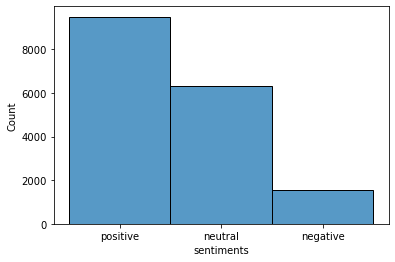

In [113]:
import seaborn
sns.histplot(data['sentiments'])
plt.show()

**Importing the necessary libraries and Modules**

In [114]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Getting started with NLTK Resources - DOWNLOADING**

In [115]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

**Preprocessing class**
 - - To handle the preprocessinglogic in an organized way

In [117]:
class SentimentDataPreprocessor:
    def __init__(self, data_path):
        """
        Initialize the preprocessing class.
        """
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)

        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.raw_data = pd.read_csv(data_path)

Defining the clean_text Method
- - Cleaning pipeline to prepare the data for modeling

In [ ]:
def preprocess_text(self, text):
        """
        Clean and preprocess a single text entry.
        """
        # Convert to lowercase
        text = text.lower()

        # Tokenize
        tokens = nltk.word_tokenize(text)

        # Remove non-alphanumeric tokens and stop words, then lemmatize
        cleaned_tokens = [
            self.lemmatizer.lemmatize(token) 
            for token in tokens 
            if token.isalnum() and token not in self.stop_words
        ]
        
        return ' '.join(cleaned_tokens)

Preprocess_data -- Defining the method
- - Clen text data, encode labels and spli the dataset for training and testing

In [120]:
def preprocess_data(self, text_column, label_column):
        """
        Preprocess text data and split into training and testing sets.
        """
        # Preprocess the text column
        self.raw_data['processed_text'] = self.raw_data[text_column].apply(self.preprocess_text)

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            self.raw_data['processed_text'], 
            self.raw_data[label_column], 
            test_size=0.2, 
            random_state=42
        )
        
        return {
            'train': (X_train, y_train),
            'test': (X_test, y_test)
        }

In [78]:
def preprocess_data(self, text_column, label_column):
        """
        Preprocess text data and split into training and testing sets.
        """
        # Clean the text data
        self.raw_data['cleaned_text'] = self.raw_data[text_column].apply(self.clean_text)
        
        # Encode labels
        label_encoder = LabelEncoder()
        self.raw_data['encoded_label'] = label_encoder.fit_transform(self.raw_data[label_column])
        
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            self.raw_data['cleaned_text'], 
            self.raw_data['encoded_label'], 
            test_size=0.2, 
            random_state=42
        )
        
        return {
            'train': (X_train, y_train),
            'test': (X_test, y_test),
            'label_encoder': label_encoder
        }


Creating the tokenizer method
- - Fit a tokenozer to text data for use with DPL models

In [121]:
def create_tokenizer(self, texts, max_words=5000):
        """
        Create a tokenizer fitted to the text data.
        """
        tokenizer = tf.keras.preprocessing.text.Tokenizer(
            num_words=max_words, 
            oov_token='<OOV>'
        )
        tokenizer.fit_on_texts(texts)
        return tokenizer


Sequence pad method
- - Convert text data into padded sequence suitable for DL models

In [122]:
def sequence_pad(self, tokenizer, texts, max_length=100):
        """
        Convert text data into padded sequences.
        """
        sequences = tokenizer.texts_to_sequences(texts)
        padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
            sequences, 
            maxlen=max_length, 
            padding='post', 
            truncating='post'
        )
        return padded_sequences


Instantiate the preprocessor
-  - Instantiate the preprocessor class and load the dataset

In [123]:
data_path =  './cleaned_reviews.csv'
preprocessor  = SentimentDataPreprocessor(data_path)


In [ ]:
# Assuming the cleaned dataset has 'reviews_text' and 'sentiments' columns
processed = preprocessor.preprocess_data(text_column='reviews_text', label_column='sentiments')

# Train and test splits
X_train, y_train = processed['train']
X_test, y_test = processed['test']


In [88]:
data_path = './cleaned_reviews.csv'
preprocessor = SentimentDataPreprocessor(data_path)


Apply text cleaning to the data:encode labels and split the data

In [127]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

class SentimentDataPreprocessor:
    def __init__(self, data_path):
        """
        Initialize the preprocessing class.
        """
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)

        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.raw_data = pd.read_csv(data_path)

    def preprocess_text(self, text):
        """
        Clean and preprocess a single text entry.
        """
        # Convert to lowercase
        text = text.lower()

        # Tokenize
        tokens = word_tokenize(text)

        # Remove non-alphanumeric tokens and stop words, then lemmatize
        cleaned_tokens = [
            self.lemmatizer.lemmatize(token) 
            for token in tokens 
            if token.isalnum() and token not in self.stop_words
        ]
        
        return ' '.join(cleaned_tokens)

    def preprocess_data(self, text_column, label_column):
        """
        Preprocess text data and split into training and testing sets.
        """
        # Preprocess the text column
        self.raw_data['processed_text'] = self.raw_data[text_column].apply(self.preprocess_text)

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            self.raw_data['processed_text'], 
            self.raw_data[label_column], 
            test_size=0.2, 
            random_state=42
        )
        
        return {
            'train': (X_train, y_train),
            'test': (X_test, y_test)
        }


In [128]:
data_path = './cleaned_reviews.csv'
preprocessor = SentimentDataPreprocessor(data_path)


In [130]:
def preprocess_text(self, text):
    """
    Clean and preprocess a single text entry.
    """
    if not isinstance(text, str):
        # Return an empty string if the input is not a valid string
        return ""

    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove non-alphanumeric tokens and stop words, then lemmatize
    cleaned_tokens = [
        self.lemmatizer.lemmatize(token)
        for token in tokens
        if token.isalnum() and token not in self.stop_words
    ]
    
    return ' '.join(cleaned_tokens)


In [132]:
def preprocess_data(self, text_column, label_column):
    """
    Preprocess text data and split into training and testing sets.
    """
    # Convert all text entries to strings to handle missing values or non-string types
    self.raw_data[text_column] = self.raw_data[text_column].astype(str)

    # Preprocess the text column
    self.raw_data['processed_text'] = self.raw_data[text_column].apply(self.preprocess_text)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        self.raw_data['processed_text'], 
        self.raw_data[label_column], 
        test_size=0.2, 
        random_state=42
    )
    
    return {
        'train': (X_train, y_train),
        'test': (X_test, y_test)
    }


In [ ]:
processed = preprocessor.preprocess_data(text_column='cleaned_review', label_column='sentiments')
X_train, y_train = processed['train']
X_test, y_test = processed['test']


In [ ]:
# Preprocess the dataset
processed = preprocessor.preprocess_data(text_column='reviews_text', label_column='sentiments')

# Access train and test splits
X_train, y_train = processed['train']
X_test, y_test = processed['test']